## 5.3 交叉验证（以热导率数据为例）

### 5.3.1 导入拟合代码

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('ltc.csv')
df

,Compound,Temperature(K),mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,...,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,LTC,Unnamed: 274
0,AlAs,152.91209,5.720212,3.110000e-15,5.720212,5.720212,2.780000e-16,1.000000,1.000000,0.160958,...,166.0,195.500000,0.222222,0.222222,0.555556,0,1.000000,0.078014,266.67806,NaN
1,AlP,140.72993,5.368858,3.150000e-10,5.368858,5.368858,1.660000e-11,1.000000,1.000000,0.146248,...,113.5,0.500000,0.500000,0.000000,0.000000,1,0.080661,0.040330,181.81181,NaN
2,AlP (F-43m),162.26119,5.720212,1.330000e-15,5.720212,5.720212,5.000000e-16,1.000000,1.000000,0.160958,...,195.5,0.222222,0.222222,0.555556,0.000000,1,0.047247,0.023624,406.56566,NaN
3,AlSb,148.62687,5.720212,0.000000e+00,5.720212,5.720212,2.780000e-16,1.000000,1.000000,0.160958,...,166.0,0.307692,0.307692,0.384615,0.000000,1,0.005609,0.002627,220.89844,NaN
4,B2AsP,142.34014,5.731569,1.021271e-01,5.541343,5.935824,1.160746e-02,0.977966,1.023215,0.160397,...,229.0,0.233333,0.100000,0.666667,0.000000,0,0.285663,0.131096,2609.97732,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,TePb,147.79412,6.000000,4.440000e-16,6.000000,6.000000,0.000000e+00,1.000000,1.000000,0.000000,...,166.0,0.307692,0.307692,0.384615,0.000000,1,0.005609,0.002627,8.57498,NaN
115,Ti2SnC,100.70368,9.383733,1.691867e+00,6.000000,11.858700,9.280932e-02,0.814381,1.163322,0.089257,...,194.0,0.307692,0.153846,0.538462,0.000000,0,0.225103,0.077479,89.87041,NaN
116,TlBr,160.52725,11.956922,8.880000e-16,11.956922,11.956922,1.670000e-16,1.000000,1.000000,0.051982,...,84.0,0.500000,0.500000,0.000000,0.000000,1,0.005609,0.002805,0.93056,NaN
117,TlCl,160.26508,11.956922,8.880000e-16,11.956922,11.956922,2.220000e-16,1.000000,1.000000,0.051982,...,115.0,0.142857,0.142857,0.714286,0.000000,1,0.033646,0.016823,1.69616,NaN


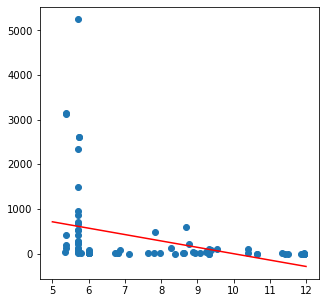

In [2]:
X = df['mean_EffectiveCoordination'].values.reshape(-1,1)
y = df['LTC'].values
lr = LinearRegression()
lr.fit(X, y)
plt.figure(figsize = (5, 5))
plt.scatter(df['mean_EffectiveCoordination'], df['LTC'])
plot_x = np.linspace(5, 12)
plot_y = plot_x * lr.coef_ + lr.intercept_
plt.plot(plot_x, plot_y, c = 'r')
plt.show()

### 5.2.2. 留出法

In [3]:
119*0.3

35.699999999999996

In [4]:
X_lo_train, y_lo_train = X[:-35], y[:-35]
X_lo_test, y_lo_test = X[-35:], y[-35:]

In [5]:
lr_lo = LinearRegression()
lr_lo.fit(X_lo_train, y_lo_train)
print(lr_lo.coef_,lr_lo.intercept_)

[-136.98658328] 1375.0261185904187


In [6]:
from sklearn.metrics import mean_squared_error

R2_lo = lr_lo.score(X_lo_test,y_lo_test)
print('RMSE = %.3f'% np.sqrt(mean_squared_error(y_true = y_lo_test,
                                                y_pred = lr_lo.predict(X_lo_test))))
print('R2 = ' + str(R2_lo))

RMSE = 831.068
R2 = 0.1063898139220959


### 5.2.3. k折交叉验证

cross_val_score()函数默认scoring = None, 即scoring = 'r2', 输出决定系数r^2，若使用scoring = 'neg_mean_squared_error’，则输出均方根误差的负值

In [7]:
from sklearn.model_selection import cross_val_score

rmse_scores = cross_val_score(lr, X, y,
                              scoring = 'neg_root_mean_squared_error', cv = 5)
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Folds: 5, mean RMSE: 646.926


### 5.2.4. 留一法（Leave-One-Out, LOO, n折交叉验证）

In [8]:
rmse_scores = cross_val_score(lr, X, y,
                              scoring = 'neg_root_mean_squared_error', cv=len(X))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Folds: 119, mean RMSE: 358.903
